<h1 style='text-align: center;'>UK ROAD ACCIDENT DATA ANALYSIS</h1>
<br>
<h2 style='text-align: center;'>JAY CEE I. MACARAIG</h2>
<h3 style='text-align: center;'>BSIT - 3B</h3>
<hr>

<h2>IMPORTING IMPORTANT LIBRARIES</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<hr><br>
<h2>CLEANING DATA TYPES AND FILLING UP NULL VALUES</h2>

In [4]:
data.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [5]:
data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].fillna('unaccounted')
data['Road_Type'] = data['Road_Type'].fillna('unaccounted')
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].fillna(data['Urban_or_Rural_Area'].mode()[0])
data['Weather_Conditions'] = data['Weather_Conditions'].fillna('unaccounted')

In [7]:
data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [8]:
data['Accident_Severity'] = data['Accident_Severity'].astype('category')
data['Light_Conditions'] = data['Light_Conditions'].astype('category')
data['District Area'] = data['District Area'].astype('category')
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].astype('category')
data['Road_Type'] = data['Road_Type'].astype('category')
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].astype('category')
data['Weather_Conditions'] = data['Weather_Conditions'].astype('category')
data['Vehicle_Type'] = data['Vehicle_Type'].astype('category')

In [9]:
data.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

In [10]:
data['Accident Date'] = data['Accident Date'].str.strip()

data['Accident Date'] = data['Accident Date'].astype('str')

data['Accident Date'] = data['Accident Date'].str.replace('/', '-')

data['Accident Date'] = pd.to_datetime(data['Accident Date'], dayfirst = True, errors = 'coerce')

In [11]:
data.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [12]:
data['Day'] = data['Accident Date'].dt.day
data['Month'] = data['Accident Date'].dt.month
data['Year'] = data['Accident Date'].dt.year
data['DayofWeek'] = data['Accident Date'].dt.dayofweek

<br>
<br>
<h2 style='text-align: center;'>DATA EXPLORATORY ANALYSIS</h2>
<hr>

<br>
<br>
<h2>QUESTION 1: WHICH DISTRICT AREA HOLDS THE MOST FATAL ACCIDENTS?</h2>
<hr>

In [13]:
fatal_accidents = data[data['Accident_Severity'] == 'Fatal']

fatal_accidents['District Area'].value_counts().sort_values(ascending=False)

District Area
Birmingham                  105
Leeds                        93
Highland                     88
East Riding of Yorkshire     85
Bradford                     71
                           ... 
Orkney Islands                2
Havant                        2
Stevenage                     1
Clackmannanshire              1
Harlow                        1
Name: count, Length: 422, dtype: int64

<br>
<h4>The data analysis shown above says that <strong>BIRMINGHAM</strong> holds the most fatal accidents in UK.  Birmingham has 105 number of fatal accidents.</h4>
<p><i>INSIGHT:</i></p>
<hr>
<br>

<br>
<br>
<h2>QUESTION 2: WHERE DO MORE SEVERE ACCIDENTS HAPPEN? IS IT IN URBAN OR RURAL AREAS?</h2>
<hr>

In [14]:
severe_accidents = data[data['Accident_Severity'] == 'Serious']

severe_accidents['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          50904
Rural          37312
Unallocated        1
Name: count, dtype: int64

<br>
<h4>The data analysis shown above says that <strong>URBAN AREA</strong> has more severe accidents in the UK. Urban areas has 20k more accidents than Rural areas.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 3: WHICH VEHICLE TYPE HAS THE HIGHEST NUMBER OF CASUALTIES?</h2>
<hr>

In [15]:
data.groupby('Vehicle_Type')['Number_of_Casualties'].sum().sort_values(ascending=False)

Vehicle_Type
Car                                      676692
Van / Goods 3.5 tonnes mgw or under       46271
Bus or coach (17 or more pass seats)      34915
Motorcycle over 500cc                     34879
Goods 7.5 tonnes mgw and over             23397
Motorcycle 125cc and under                20348
Taxi/Private hire car                     18195
Motorcycle over 125cc and up to 500cc     10286
Motorcycle 50cc and under                 10167
Goods over 3.5t. and under 7.5t            8308
Other vehicle                              7554
Minibus (8 - 16 passenger seats)           2659
Agricultural vehicle                       2613
Pedal cycle                                 270
Data missing or out of range                  9
Ridden horse                                  5
Name: Number_of_Casualties, dtype: int64

<br>
<h4>The data analysis showsn above says that <strong>CAR TYPE VEHICLE</strong> has the highest number of casualties when it comes to road accidents in the UK. Car being the vehicle type with the highest casualties is maybe due to its being the most common owned vehicle in the nation.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 4: WHAT WEATHER CONDITIONS HOST THE MOST ACCIDENTS IN A SINGLE CARRIAGEWAY TYPE OF ROAD?</h2>
<hr>

In [16]:
single_carriageway = data[data['Road_Type'] == 'Single carriageway']

single_carriageway['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       389830
Raining no high winds     58581
Other                     13156
unaccounted                9761
Raining + high winds       6703
Fine + high winds          6178
Snowing no high winds      4751
Fog or mist                2541
Snowing + high winds        642
Name: count, dtype: int64

<br>
<h4>The data analysis shown above says that the weather condition with the highest accidents occuring in a single carriageway type of road is usually <strong>Fine no high winds</strong>. The data above shows that accidents occur usually in a normal day in the UK.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 5: IN WHAT TIME OF THE DAY OR LIGHT CONDITIONS MOST ACCIDENTS HAPPEN?</h2>
<hr>

In [17]:
data['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<br>
<h4>The data analysis shown above says that its usually in <strong>Daylight</strong> that most accidents in the UK happends. The data above shows that accidents occur usually in a morning in the UK, with the value of 484,880 accidents in a Daylight setting.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 6: IN WHAT TYPE OF ROAD DOES MOST ACCIDENTS HAPPEN?</h2>
<hr>

In [18]:
data['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<br>
<h4>The data analysis shown above says that its usually in <strong>Single carriageway</strong> that most accidents in the UK happends. The data above shows that accidents occur usually in single carriageway in the UK, with the value of 496,663 accidents.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 7: IN WHAT DISTRICT AREA HAD THE ACCIDENT WITH THE MOST CASUALTIES THAT IS EVER RECORDED?</h2>
<hr>

In [19]:
highest_casualties = data['Number_of_Casualties'].max()

print(f'THE HIGHEST CASUALTIES IN ONE ACCIDENT EVER RECORDED IS {highest_casualties}')

data[data['Number_of_Casualties'] == highest_casualties]

THE HIGHEST CASUALTIES IN ONE ACCIDENT EVER RECORDED IS 68


,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year,DayofWeek
117980,200743N002017,Fatal,2019-01-03,51.497547,Darkness - lights lit,South Bucks,-0.496697,68,1,Wet or damp,Slip road,Rural,Raining no high winds,Car,3,1,2019,3


<br>
<h4>The data analysis shown above says that the accident with the most casualties ever recorded in the dataset is in <strong>South Bucks</strong> district. The data above shows that number of casualties is 68 and it happened on January 3rd, 2019</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 8: WHAT'S THE AVERAGE NUMBER OF CASUALTIES BY THE SEVERITY OF ACCIDENTS?</h2>
<hr>

In [20]:
np.round(data.groupby('Accident_Severity')['Number_of_Casualties'].mean(),2)

Accident_Severity
Fatal      1.90
Serious    1.47
Slight     1.33
Name: Number_of_Casualties, dtype: float64

<br>
<h4>When it comes to Fatal Accidents, the average number of casualties is <strong>1.90</strong>. While, when it comes to Serious Accidents, it is <strong>1.47</strong>. Lastly, when it comes to Slight Accidents, it is <strong>1.33</strong>. The data above shows that the average number of casualties, be it in every severity of accidents does not exceeds to more than 2</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 9: WHAT IS THE MOST FREQUENT ROAD SURFACE CONDITION THAT IS FOUND IN URBAN AREA WHEN AN ACCIDENT HAPPENS?</h2>
<hr>

In [21]:
urban_area = data[data['Urban_or_Rural_Area'] == 'Urban']

urban_area['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     302955
Wet or damp             107698
Frost or ice              7564
Snow                      2788
unaccounted                442
Flood over 3cm. deep       231
Name: count, dtype: int64

<br>
<h4>The data shown above says that the surface of the road is usually <strong>Dry</strong> when an accident happens. Dry and wet/damp are the common road surface condition when an accident happens in the UK.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 10: WHAT DATE HAS THE HIGHEST ROAD ACCIDENTS EVER RECORDED? HOW MANY CASUALTIES WERE AFFECTED THAT DATE? </h2>
<hr>

In [22]:
most_frequent_date = data['Accident Date'].mode()[0]
total_casualties = data[data['Accident Date'] == most_frequent_date]['Number_of_Casualties'].sum()

print(f'THE DATE WITH THE HIGHEST ROAD ACCIDENT IS {most_frequent_date}')
print(f'WHILE THE TOTAL CASUALTIES DURING THAT DAY IS {total_casualties}')

data[data['Accident Date'] == most_frequent_date]

THE DATE WITH THE HIGHEST ROAD ACCIDENT IS 2019-11-30 00:00:00
WHILE THE TOTAL CASUALTIES DURING THAT DAY IS 938


,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year,DayofWeek
627,200701BS70671,Slight,2019-11-30,51.495858,Darkness - lights lit,Kensington and Chelsea,-0.192343,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,30,11,2019,5
629,200701BS70673,Slight,2019-11-30,51.523668,Darkness - lights lit,Kensington and Chelsea,-0.217334,3,3,Wet or damp,Single carriageway,Urban,Raining no high winds,Goods 7.5 tonnes mgw and over,30,11,2019,5
639,200701BS70685,Slight,2019-11-30,51.490534,Daylight,Kensington and Chelsea,-0.191113,1,1,Dry,Single carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,30,11,2019,5
647,200701BS70694,Slight,2019-11-30,51.505260,Darkness - lights lit,Kensington and Chelsea,-0.213153,1,1,Wet or damp,Dual carriageway,Urban,Raining no high winds,Motorcycle over 500cc,30,11,2019,5
674,200701BS70725,Serious,2019-11-30,51.484887,Darkness - lights lit,Kensington and Chelsea,-0.174917,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,30,11,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181141,200797UA70811,Serious,2019-11-30,55.642006,Daylight,North Ayrshire,-4.683832,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,30,11,2019,5
181945,2.01E+12,Serious,2019-11-30,55.050682,Daylight,Dumfries and Galloway,-3.776910,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,30,11,2019,5
181946,2.01E+12,Slight,2019-11-30,55.031332,Darkness - no lighting,Dumfries and Galloway,-3.617705,1,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Car,30,11,2019,5
181949,2.01E+12,Serious,2019-11-30,55.068908,Daylight,Dumfries and Galloway,-3.610294,1,1,Wet or damp,One way street,Urban,Raining no high winds,Car,30,11,2019,5


<br>
<h4>The data above shows that the date with the highest accidents is on <strong>November 30th, 2019</strong>. While, the total casualties falls into <strong>938</strong> during that day.  A total of 704 accidents during that day was recorded, all happening across the nation of UK.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 11: DOES THE GEOGRAPHICAL AREA (URBAN & RURAL) HAS A SIGNIFICANT EFFECT TO THE NUMBER OF CASUALTIES PER ACCIDENT? </h2>
<hr>

In [23]:
from scipy.stats import f_oneway

urban_casualties = data[data['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties']
rural_casualties = data[data['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties']


stats, p_value = f_oneway(urban_casualties, rural_casualties)

print(f'The probability value is {p_value}')
if p_value >= 0.5:
    print(f'Hence, it does have a correlation.')
else:
    print(f'Hence, it does not have a correlation.')

# if probability value >= 0.5 = with correlation
# else if probability value < 0.5 = no correlation

The probability value is 0.0
Hence, it does not have a correlation.


<br>
<h4>The analysis above shows that the Geograhpical area <strong>do not have a correlation</strong> to the number of casualties per accident. The probability that the two variable has a correlation is only 0.0,  which means that the type geographical area does not affect casuality count.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 12: DOES THE NUMBER OF VEHICLES PER ACCIDENT HAVE A CORRELATION TO THE NUMBER OF CASUALTIES? </h2>
<hr>

In [24]:
no_of_vehicles = data['Number_of_Vehicles']
no_of_casualties = data['Number_of_Casualties']

p_value = no_of_vehicles.corr(no_of_casualties)

print(f'The probability value is {p_value}')
if p_value >= 0.5:
    print(f'Hence, it does have a correlation.')
else:
    print(f'Hence, it does not have a correlation.')

# if probability value >= 0.5 = with correlation
# else if probability value < 0.5 = no correlation

The probability value is 0.22888886126927557
Hence, it does not have a correlation.


<br>
<h4>The analysis above shows that the number of vehicles <strong>do not have a correlation</strong> to the number of casualties per accident. The probability that the two variable has a correlation is only 0.0.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 13: DOES THE SEVERITY OF THE ACCIDENT HAS A SIGNIFICANT EFFECT TO NUMBER OF CASUALTIES?</h2>
<hr>

In [25]:
data['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [26]:
from scipy.stats import f_oneway

fatal_accidents = data[data['Accident_Severity'] == 'Fatal']['Number_of_Casualties']
serious_accidents = data[data['Accident_Severity'] == 'Serious']['Number_of_Casualties']
slight_accidents = data[data['Accident_Severity'] == 'Slight']['Number_of_Casualties']


stats, p_value = f_oneway(fatal_accidents, serious_accidents, slight_accidents)

print(f'The probability value is {p_value}')
if p_value >= 0.5:
    print(f'Hence, it does have a correlation.')
else:
    print(f'Hence, it does not have a correlation.')

# if probability value >= 0.5 = with correlation
# else if probability value < 0.5 = no correlation

The probability value is 0.0
Hence, it does not have a correlation.


<br>
<h4>The analysis above shows that the severity of an accident <strong>do not have a correlation</strong> to the number of casualties per accident. The probability that the two variable has a correlation is only 0.0,  which means that the severity of an accident does not affect casuality count.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 14: DOES THE TYPE OF ROAD HAS A SIGNIFICANT EFFECT TO NUMBER OF CASUALTIES IN A ROAD ACCIDENT?</h2>
<hr>

In [27]:
from scipy.stats import f_oneway

single_carriageway = data[data['Road_Type'] == 'Single carriageway']['Number_of_Casualties']
dual_carriageway = data[data['Road_Type'] == 'Dual carriageway']['Number_of_Casualties']
roundabout = data[data['Road_Type'] == 'Roundabout']['Number_of_Casualties']
one_way_street = data[data['Road_Type'] == 'One way street']['Number_of_Casualties']
slip_road = data[data['Road_Type'] == 'Slip road']['Number_of_Casualties']


stats, p_value = f_oneway(single_carriageway, dual_carriageway, roundabout, one_way_street, slip_road)

print(f'The probability value is {p_value}')
if p_value >= 0.5:
    print(f'Hence, it does have a correlation.')
else:
    print(f'Hence, it does not have a correlation.')

# if probability value >= 0.5 = with correlation
# else if probability value < 0.5 = no correlation

The probability value is 0.0
Hence, it does not have a correlation.


<br>
<h4>The analysis above shows that the type of road <strong>do not have a correlation</strong> to the number of casualties per accident. The probability that the two variable has a correlation is only 0.0, which means that the type of road does not affect casuality count.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 15: DOES THE LIGHT CONDITION OF A ROAD HAS A SIGNIFICANT EFFECT TO NUMBER OF CASUALTIES IN A ROAD ACCIDENT?</h2>
<hr>

In [28]:
from scipy.stats import f_oneway

daylight = data[data['Light_Conditions'] == 'Daylight']['Number_of_Casualties']
dark_lights_lit = data[data['Light_Conditions'] == 'Darkness - lights lit']['Number_of_Casualties']
dark_no_lighting = data[data['Light_Conditions'] == 'Darkness - no lighting']['Number_of_Casualties']
dark_lighting_unknown = data[data['Light_Conditions'] == 'Darkness - lighting unknown']['Number_of_Casualties']
dark_lights_unlit = data[data['Light_Conditions'] == 'Darkness - lights unlit']['Number_of_Casualties']


stats, p_value = f_oneway(daylight, dark_lights_lit, dark_no_lighting, dark_lighting_unknown, dark_lights_unlit)

print(f'The probability value is {p_value}')
if p_value >= 0.5:
    print(f'Hence, it does have a correlation.')
else:
    print(f'Hence, it does not have a correlation.')

# if probability value >= 0.5 = with correlation
# else if probability value < 0.5 = no correlation

The probability value is 0.0
Hence, it does not have a correlation.


<br>
<h4>The analysis above shows that the light conditions of a road <strong>do not have a correlation</strong> to the number of casualties per accident. The probability that the two variable has a correlation is only 0.0, which means that the light condition of a road does not affect casuality count.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 16: HOW IS ACCIDENT SEVERITY DISTRIBUTED ACROSS ALL RECORDED ACCIDENTS?</h2>
<hr>

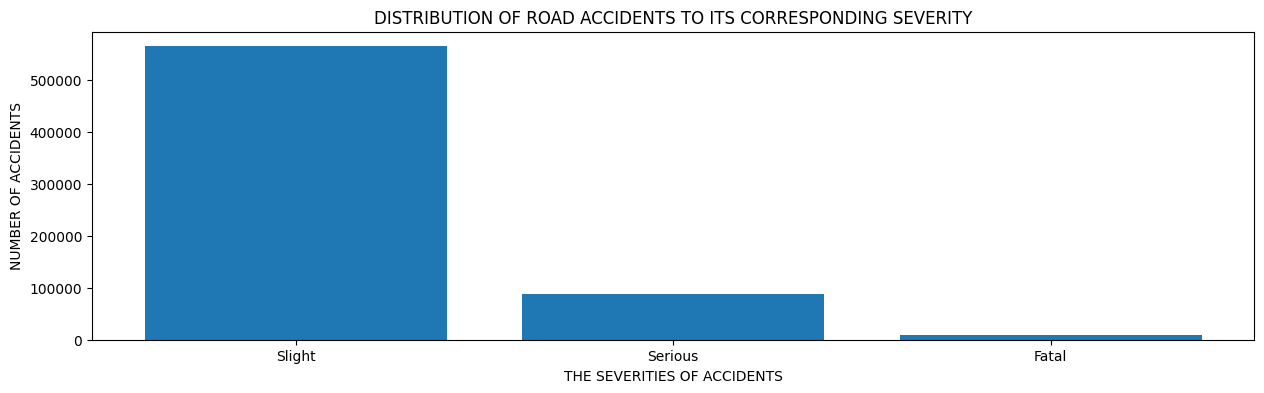

In [29]:
datas = data['Accident_Severity'].value_counts()

plt.figure(figsize=(15, 4))
plt.bar(datas.index,datas.values)
plt.xlabel('THE SEVERITIES OF ACCIDENTS')
plt.ylabel('NUMBER OF ACCIDENTS')
plt.title('DISTRIBUTION OF ROAD ACCIDENTS TO ITS CORRESPONDING SEVERITY')
plt.show()

<br>
<h4>The data visualization above shows that among the 3 levels of accident severity, the <strong>SLIGHT LEVEL</strong> of accident severity shows to be the highest. The analysis shows that the Slight level has a big gap among the 2 other level of severity, which is morally good.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 17: GIVE THE TOP 5 DISTRICT AREAS THAT HAS THE MOST ROAD ACCIDENTS BY A CAR TYPE VEHICLE.</h2>
<hr>

In [30]:
datas = data[data['Vehicle_Type'] == 'Car']['District Area'].value_counts().head(5)
datas

District Area
Birmingham    9600
Leeds         6875
Manchester    5248
Bradford      4749
Sheffield     4306
Name: count, dtype: int64

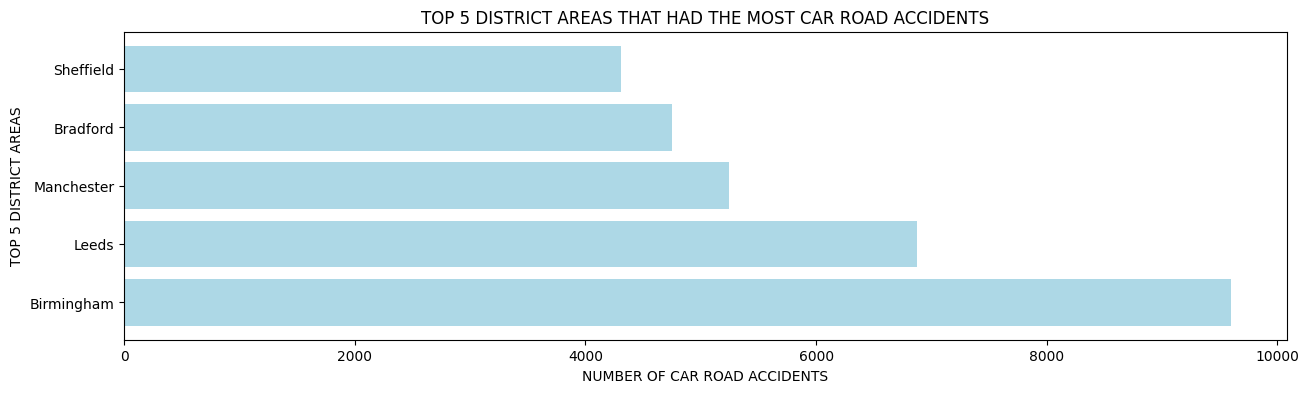

In [31]:
plt.figure(figsize=(15, 4))
plt.barh(datas.index, datas.values, color='lightblue')
plt.xlabel('NUMBER OF CAR ROAD ACCIDENTS')
plt.ylabel('TOP 5 DISTRICT AREAS')
plt.title('TOP 5 DISTRICT AREAS THAT HAD THE MOST CAR ROAD ACCIDENTS')
plt.show()

<br>
<h4>The data visualization above shows the distribution of the top 5 district areas that had the most car road accidents. It shows that <strong>BIRMINGHAM</strong> had the highest. Birmingham tops with 31.2% percent among the other 4, with also 10% gap to the next district area which is Leeds.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 18: WHICH LIGHT CONDITIONS ARE MOST COMMON DURING HIGH-CASUALTY ACCIDENTS?</h2>
<hr>

In [32]:
datas = data[data['Accident_Severity'] == 'Fatal']['Light_Conditions'].value_counts()
datas

Light_Conditions
Daylight                       5076
Darkness - lights lit          1860
Darkness - no lighting         1612
Darkness - lighting unknown      68
Darkness - lights unlit          45
Name: count, dtype: int64

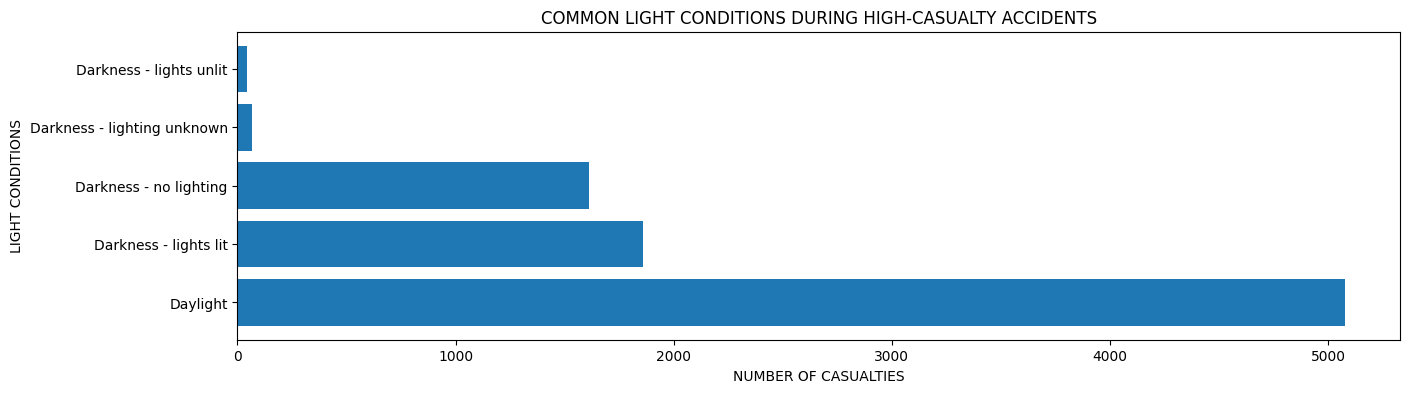

In [33]:
plt.figure(figsize=(15, 4))
plt.barh(datas.index, datas.values)
plt.xlabel('NUMBER OF CASUALTIES')
plt.ylabel('LIGHT CONDITIONS')
plt.title('COMMON LIGHT CONDITIONS DURING HIGH-CASUALTY ACCIDENTS')
plt.show()

<br>
<h4>The data visualization above shows the distribution of the common light conditions when an accident happens. It shows that in <strong>DAYLIGHT</strong> is the commonly light conditions when a fatal accident occurs.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 19: HOW DOES THE AVERAGE NUMBER OF VEHICLES VARY BY ROAD TYPE?</h2>
<hr>

In [34]:
datas = np.round(data.groupby('Road_Type')['Number_of_Vehicles'].mean(),2).sort_values(ascending=False)
datas

Road_Type
Dual carriageway      2.01
Slip road             1.92
Roundabout            1.90
Single carriageway    1.80
unaccounted           1.67
One way street        1.59
Name: Number_of_Vehicles, dtype: float64

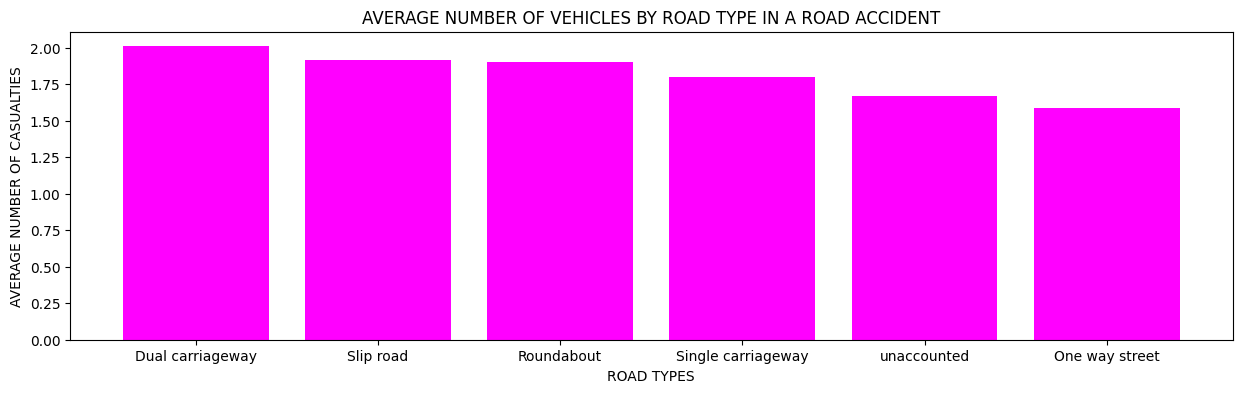

In [35]:
plt.figure(figsize=(15, 4))
plt.bar(datas.index, datas.values, color='magenta')
plt.xlabel('ROAD TYPES')
plt.ylabel('AVERAGE NUMBER OF CASUALTIES')
plt.title('AVERAGE NUMBER OF VEHICLES BY ROAD TYPE IN A ROAD ACCIDENT')
plt.show()

<br>
<h4>The data visualization above shows the distribution of the average number of vehicles by its corresponding road types in an accident. It shows that <strong>DUAL CARRIAGEWAY</strong> has the highest average casualties. One way streets show the lowest average casualties — suggesting they are safer by design. Dual carriageways have the highest — may need speed control or lane improvements.</h4>

<hr>
<br>

<br>
<br>
<h2>QUESTION 20: RANK THE TOTAL NUMBER OF CASUALTIES IN RELATED TO THE ROAD SURFACE CONDITIONS OF A ROAD ACCIDENT IN URBAN AREAS.</h2>
<hr>

In [36]:
urban_area = data[data['Urban_or_Rural_Area'] == 'Urban']
datas = urban_area.groupby('Road_Surface_Conditions')['Number_of_Casualties'].sum().sort_values(ascending=False)
datas

Road_Surface_Conditions
Dry                     384645
Wet or damp             144109
Frost or ice              9899
Snow                      3545
unaccounted                509
Flood over 3cm. deep       333
Name: Number_of_Casualties, dtype: int64

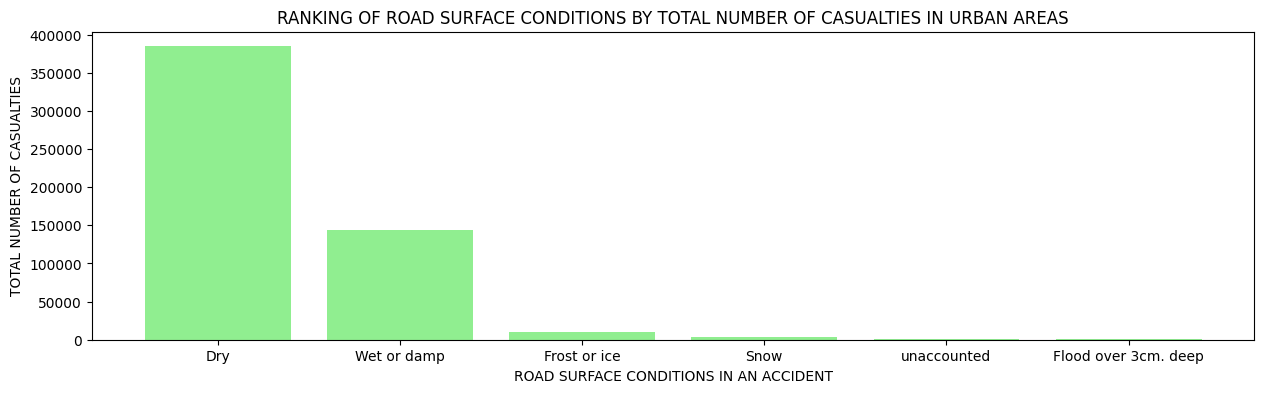

In [37]:
plt.figure(figsize=(15, 4))
plt.bar(datas.index,datas.values, color='lightgreen')
plt.xlabel('ROAD SURFACE CONDITIONS IN AN ACCIDENT')
plt.ylabel('TOTAL NUMBER OF CASUALTIES')
plt.title('RANKING OF ROAD SURFACE CONDITIONS BY TOTAL NUMBER OF CASUALTIES IN URBAN AREAS')
plt.show()

<br>
<h4>The data visualization above shows the distribution of the total number of casualties in related to its road surface conditions in urban areas. It shows that <strong>DRY SURFACE CONDITION</strong> has the highest casualties. Dry roads cause the most urban casualties — not because they’re dangerous, but because drivers let their guard down. Safety efforts should target behavior, not just conditions.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 21: IN THE YEAR THE COVID-19 STARTED TO SPREAD (EARLY 2020), WHAT IS THE TOTAL SERIOUS AND FATAL ACCIDENTS THAT WERE CAUSED MAINLY BY CAR?</h2>
<hr>

In [38]:
year2020 = data[data['Year'] == 2020][(data['Accident_Severity'] == 'Serious') | (data['Accident_Severity'] == 'Fatal')]


car_accidents_2020 = year2020[data['Vehicle_Type'] == 'Car']['Vehicle_Type'].value_counts().sum()
total_accidents = data[data['Year'] == 2020].value_counts().sum()


print(f'The total accidents that happened in the year 2020 was {total_accidents}')
print(f'While the fatal and serious accidents that was mainly caused by a car in the year 2020 was {car_accidents_2020}')
print(f'or {((car_accidents_2020/total_accidents)*100):.2f}% of the total accidents')

The total accidents that happened in the year 2020 was 170591
While the fatal and serious accidents that was mainly caused by a car in the year 2020 was 19156
or 11.23% of the total accidents


<br>
<h4>The data shows that even when a total lockdown where in operation within that year, there are still many car accidents that caused fatal and serious accidents in the UK. It shows that <strong>11.23%</strong> of the total accidents happened in the year 2020 </h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 22: WHAT IS THE PROGRESS OF UK ROAD ACCIDENTS PER YEAR? IS IT INCREASING ANUALLY?</h2>
<hr>

In [39]:
datas = data['Year'].value_counts()
total_accidents = data['Year'].value_counts().sum()
datas

print(f'The Year 2019 UK Road Accidents counts to {datas.values[0]} or {((datas.values[0]/total_accidents)*100):.1f}% of the recorded UK accidents')
print(f'While, the Year 2020 UK Road Accidents counts to {datas.values[1]} or {((datas.values[1]/total_accidents)*100):.1f}% of the recorded UK accidents')
print(f'While, the Year 2021 UK Road Accidents counts to {datas.values[2]} or {((datas.values[2]/total_accidents)*100):.1f}% of the recorded UK accidents')
print(f'While, the Year 2022 UK Road Accidents counts to {datas.values[3]} or {((datas.values[3]/total_accidents)*100):.1f}% of the recorded UK accidents')

The Year 2019 UK Road Accidents counts to 182115 or 27.6% of the recorded UK accidents
While, the Year 2020 UK Road Accidents counts to 170591 or 25.8% of the recorded UK accidents
While, the Year 2021 UK Road Accidents counts to 163554 or 24.8% of the recorded UK accidents
While, the Year 2022 UK Road Accidents counts to 144419 or 21.9% of the recorded UK accidents


Text(0.5, 1.0, 'ANUAL PROGRESS OF UK ROAD ACCIDENTS FROM 2019-2022')

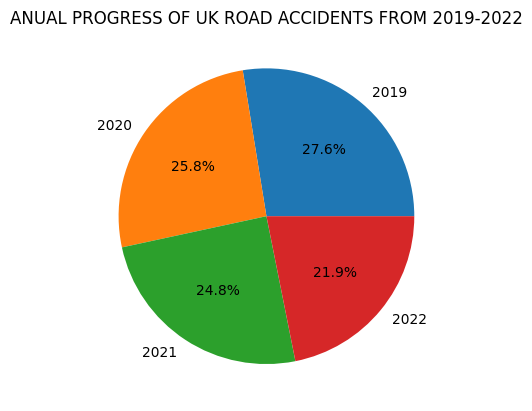

In [40]:
plt.pie(datas, labels=datas.index,  autopct='%1.1f%%')
plt.title('ANUAL PROGRESS OF UK ROAD ACCIDENTS FROM 2019-2022')

<br>
<h4>The data visualization above shows that the UK road accidents progress from 2019-2022 is <strong>DECREASING ANNUALLY</strong>. By 2022, the Road Accidents in the UK became 144,419 or 21.9% of the total accidents.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 23: WHAT DAY OF THE WEEK IS THE MOST COMMON DAY THAT A ROAD ACCIDENTS OCCUR IN THE DISTRICT AREA OF KENSINGTON AND CHEALSEA?</h2>
<hr>

In [41]:
kensington_and_chealsea = data[data['District Area'] == 'Kensington and Chelsea']
day = kensington_and_chealsea['DayofWeek'].mode()[0]

dayofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day
print(f'The most common day of the week in which an accident happens is {dayofweek[day]}')

The most common day of the week in which an accident happens is Saturday


In [42]:
kensington_and_chealsea['DayofWeek'].value_counts().sort_values(ascending=False)

DayofWeek
5    456
3    452
4    447
2    434
1    397
6    343
0    270
Name: count, dtype: int64

<br>
<h4>The data analyzation above shows that the most common day of the week that an accident occurs in the District Area of Kensington and Chealsea is <strong>SATURDAY</strong></h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 24: HOW MANY CAR ACCIDENTS DID HAPPENED IN THE SUMMER SEASON (JUNE - SEPTEMBER) OF THE YEAR 2022?</h2>
<hr>

In [43]:
year2022 = data[data['Year'] == 2022]
total_accidents = year2022['Year'].value_counts().sum()

summer = year2022[(year2022['Month'] >= 6) & (year2022['Month'] < 10)]
car_accidents = summer['Vehicle_Type'].value_counts()


print(f'There are {car_accidents[0]} Car accidents in the summer season of the year 2022. {((car_accidents[0]/total_accidents)*100):.1f}% of the total accidents in the year 2022.')
car_accidents

There are 39229 Car accidents in the summer season of the year 2022. 27.2% of the total accidents in the year 2022.


Vehicle_Type
Car                                      39229
Van / Goods 3.5 tonnes mgw or under       2679
Motorcycle over 500cc                     1784
Bus or coach (17 or more pass seats)      1585
Motorcycle 125cc and under                1220
Goods 7.5 tonnes mgw and over              975
Taxi/Private hire car                      968
Motorcycle 50cc and under                  595
Motorcycle over 125cc and up to 500cc      478
Goods over 3.5t. and under 7.5t            394
Other vehicle                              356
Minibus (8 - 16 passenger seats)           140
Agricultural vehicle                        99
Pedal cycle                                 11
Data missing or out of range                 0
Ridden horse                                 0
Name: count, dtype: int64

<br>
<h4>There are <strong>39,229</strong> Car accidents during the summer season of the year 2022. The data above shows that the gap between the accidents with the other vehicle type is super far.</h4>
<hr>
<br>

<br>
<br>
<h2>QUESTION 25: WHAT IS THE TOTAL NUMBER OF CASUALTIES THAT OCCURED IN THE DAY OF CHRISTMAS IN THE YEAR 2019?</h2>
<hr>

In [44]:
christmas = data[data['Year'] == 2019][data['Month']== 12][data['Day'] == 25]
total_casualties = christmas['Number_of_Casualties'].value_counts().sum()

print(f'Total Number of Casualties : {total_casualties}')

Total Number of Casualties : 157


<br>
<h4>There are <strong>157</strong> number of casualties that occured during the Christmas Holiday of the year 2019.</h4>
<hr>
<br>

<br>
<br>
<h2 style='text-align: center;'>6 DATA VISUALIZATION OF DATAS IN DISTRICT AREAS</h2>
<hr>
<br>
<br>

In [45]:
data['District Area'].unique()

['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames', 'Hammersmith and Fulham', 'Hounslow', ..., 'County Durham', 'Shropshire', 'Central Bedfordshire', 'Cornwall', 'Wiltshire']
Length: 422
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

In [46]:
greenwich_df = data[data['District Area'] == 'Greenwich']
richmondshire_df = data[data['District Area'] == 'Richmondshire']
cornwall_df = data[data['District Area'] == 'Cornwall']
warwick_df = data[data['District Area'] == 'Warwick']
fife_df = data[data['District Area'] == 'Fife']
lincoln_df = data[data['District Area'] == 'Lincoln']

<br>
<br>
<h2>VISUALIZATION 26: MONTHLY ROAD ACCIDENT PROGRESSION OF GREENWICH FROM THE YEAR (2019-2022) </h2>
<hr>

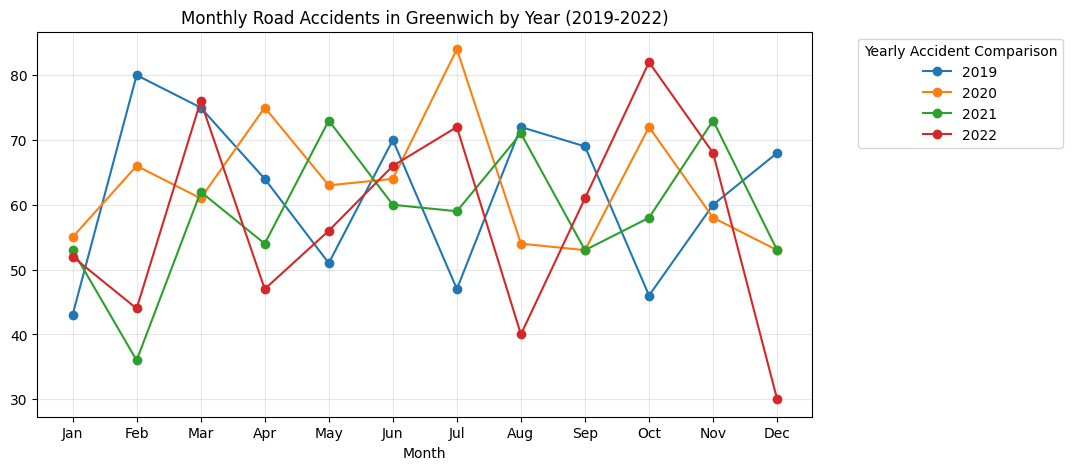

In [47]:
monthly_greenwichdata = greenwich_df.groupby(['Year', 'Month']).size()

monthly_greenwichdata = monthly_greenwichdata.unstack(level=0)

monthly_greenwichdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Greenwich by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<br>
<h4>The data visualization shows that the average road accidents in Greenwich was in the month of <strong>June</strong> throughout 2019-2022. The data visualization also shows that the year 2019 and year 2021 had a significant decrease in accidents, while it progressively increased during the year 2020 and year 2022.</h4>
<hr>
<br>

<br>
<br>
<h2>VISUALIZATION 27: ACCIDENT SEVERITY DISTRIBUTION OF ACCIDENTS IN RICHMONDSHIRE BY THE YEAR 2020</h2>
<hr>

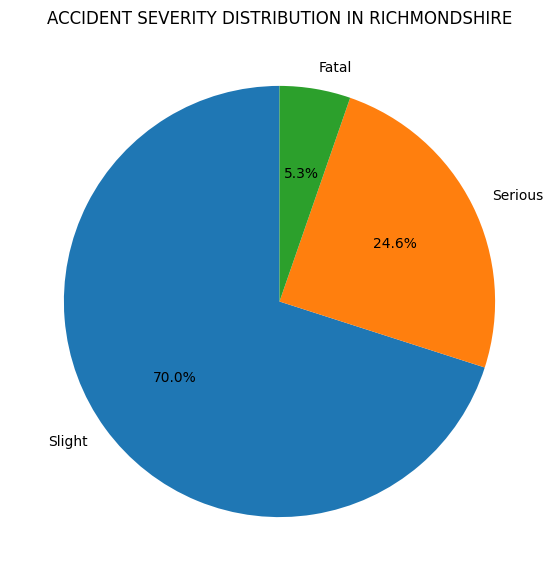

In [48]:
acc_2020 = richmondshire_df[richmondshire_df['Year'] == 2020]
severity_richmondshire = acc_2020['Accident_Severity'].value_counts()

plt.pie(severity_richmondshire,
        labels = severity_richmondshire.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('ACCIDENT SEVERITY DISTRIBUTION IN RICHMONDSHIRE')
plt.show()

<br>
<h4>The data visualization shows that it is more common in Richmondshire to have a <strong>Slight Accident Severity</strong> in the year 2020. The data visualization shows a big gap between the three, in which the Slight severity having 70% of the total accidents. Coming in second is Serious severity with 24.6%, and lastly, Fatal severity with 5.3%. The data visualization shows that accidents with fatal severity is rare in Richmondshire, which makes it safe, but not totally.</h4>
<hr>
<br>

<br>
<br>
<h2>VISUALIZATION 28: ROAD ACCIDENT DISTRIBUTION BY YEAR, MONTH, & DAY OF THE WEEK IN THE CORNWALL DISTRICT AREA.</h2>
<hr>

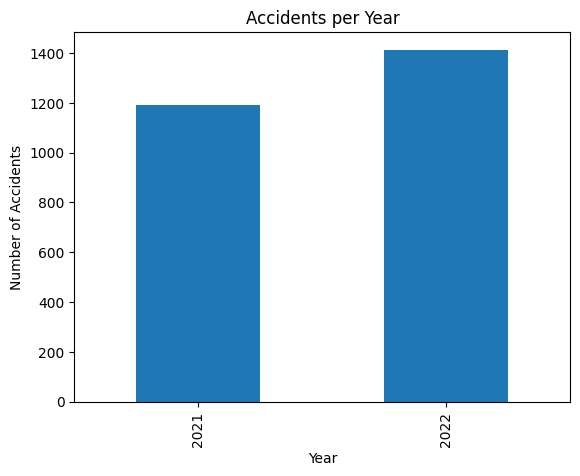

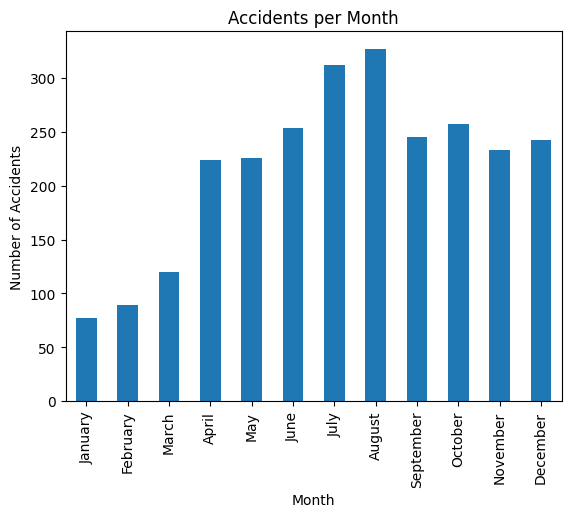

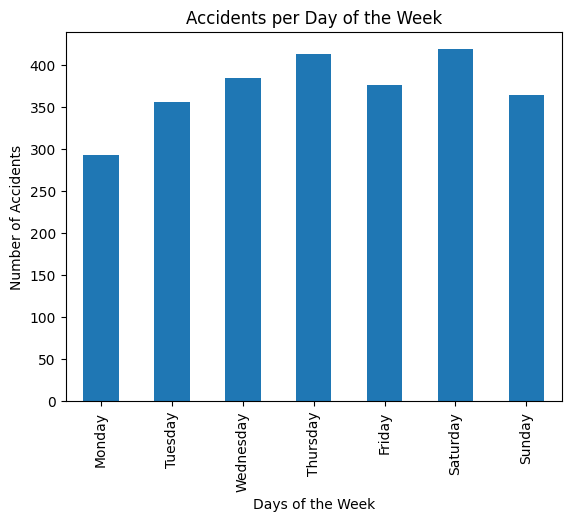

In [49]:
# Accidents per year
accidents_per_year = cornwall_df['Year'].value_counts().sort_index()
accidents_per_month = cornwall_df['Month'].value_counts().sort_index()
accidents_per_day = cornwall_df['DayofWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.show()

<br>
<h4>The data visualization shows the road accidents that occured in the District Area of Cornwall by Year, Months, and also Days of the week. It is shown that in the <strong>year 2022</strong> had the highest of road accidents in Cornwall. Furthermore, <strong>Month of August</strong> is when most recorded road accidents occured in Cornwall. Lastly, it is usually <strong>Saturday when most road accidents happens.</h4>
<hr>
<br>

<br>
<br>
<h2>VISUALIZATION 29: CAR ROAD ACCIDENT DISTRIBUTION BY DAYS OF WEEK IN WARWICK DISTRICT AREA.</h2>
<hr>

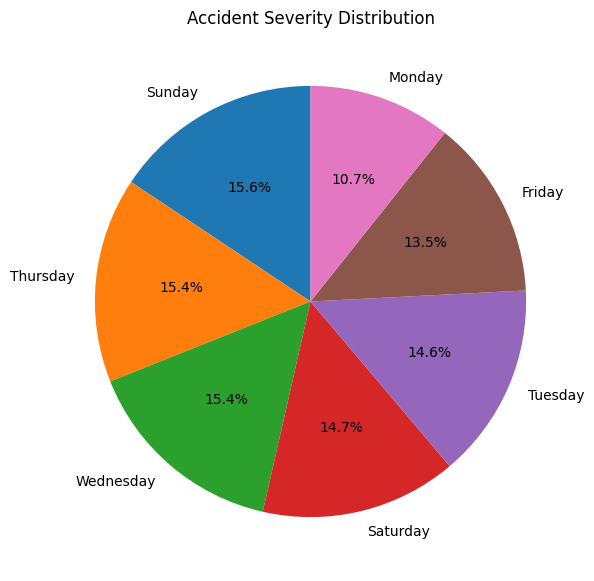

In [50]:
car_warwick = warwick_df[warwick_df['Vehicle_Type'] == 'Car']['DayofWeek'].value_counts()

day_names = {
    0: 'Monday',
    1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

car_warwick.index = car_warwick.index.map(day_names)

plt.pie(car_warwick,
        labels = car_warwick.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<br>
<h4>The data visualization shows the car road accidents distribution that occured in the District Area of Warwick by Days of the Week. It is shown that it is commonly to have a car accident in <strong>Sunday</strong>. With 15.6% of the total Car accidents, Sundays peaks at the top. Coming in second is <strong>Wednesday and Thursday</strong>, which breaks the superstition that accidents are more common in weekends. With both 15.4% of the total car accidents. Lastly, the day of the week that has the least car accidents recorded is in <strong>Monday.</strong></h4>
<hr>
<br>

<br>
<br>
<h2>VISUALIZATION 30: SEVERAL BAR GRAPHS OF ANALYTICAL DATAS FOR ROAD ACCIDENTS IN FIFE DISTRICT AREA</h2>
<hr>

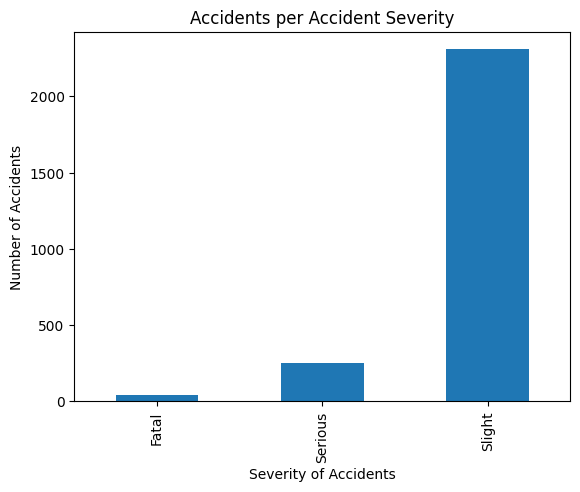

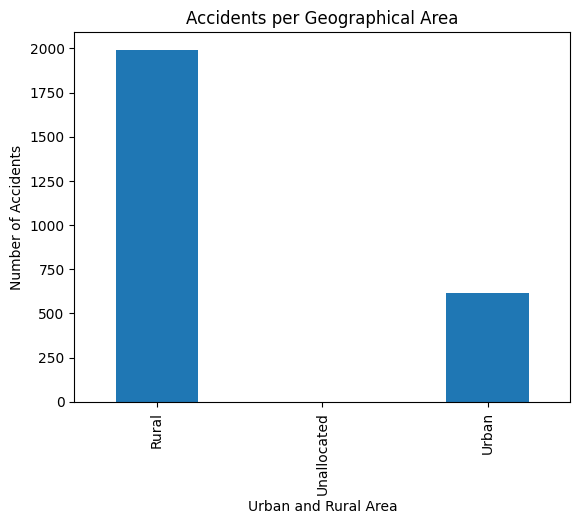

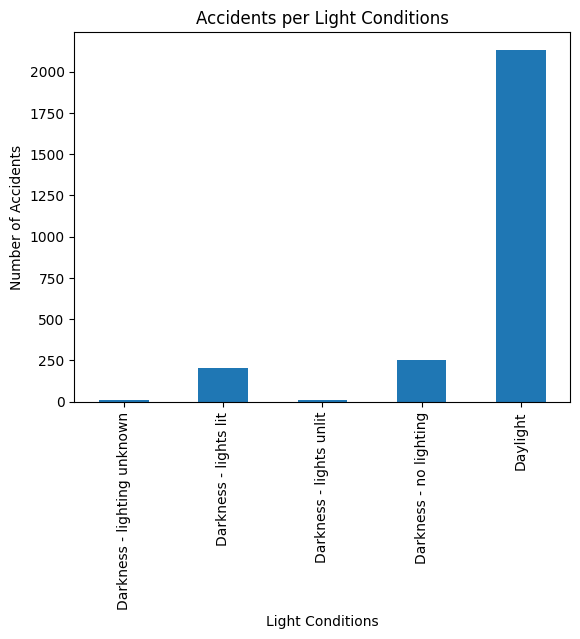

In [51]:
# Accidents per year
accidents_per_severity = cornwall_df['Accident_Severity'].value_counts().sort_index()
accidents_per_area = cornwall_df['Urban_or_Rural_Area'].value_counts().sort_index()
accidents_per_light = cornwall_df['Light_Conditions'].value_counts().sort_index()


#PER YEAR 
accidents_per_severity.plot(kind='bar')
plt.title('Accidents per Accident Severity')
plt.xlabel('Severity of Accidents')
plt.ylabel('Number of Accidents')
plt.show()


accidents_per_area.plot(kind='bar')
plt.title('Accidents per Geographical Area')
plt.xlabel('Urban and Rural Area')
plt.ylabel('Number of Accidents')
plt.show()


accidents_per_light.plot(kind='bar')
plt.title('Accidents per Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.show()

<br>
<h4>The data visualization show that the majority of incidents occur in <strong>Rural areas</strong> during <strong>Daylight hours</strong>, with most accidents classified as <strong>Slight</strong> in severity.</h4>
<hr>
<br>

<br>
<br>
<h2>VISUALIZATION 31: GEOSPATIAL ANALYSIS : HEAT MAP FOR ROAD ACCIDENTS IN LINCOLN</h2>
<hr>

In [52]:
import folium
from folium.plugins import HeatMap


locations = list(zip(lincoln_df['Latitude'], lincoln_df['Longitude']))


m = folium.Map(location = [lincoln_df['Latitude'].mean(), lincoln_df['Longitude'].mean()], zoom_start = 12)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')

m

<br>
<h4>The data visualization shows that the highest concentration of road accidents (hot spot) is located at the center of the city. A large, dense cluster centered and near the northern part of the city. These critical zones appears to be driven by high-traffic flow along major connecting roads, where they meet the main road network leading into Lincoln.</h4>
<hr>
<br>

   <h3 style="text-align: right; margin-right: 80px;">Analyst : Jay Cee I. Macaraig</h3>
   <h3 style="text-align: right; margin-right: 80px;">BSIT-3B</h3>